In [672]:
import seaborn as sea
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [673]:
plot.rcParams['figure.figsize'] = (7,5)

## Exploration

In [674]:
data = sea.load_dataset('titanic')

In [675]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [676]:
data.shape

(891, 15)

In [677]:
#CHECKING IF ALIVE AND SURVIVED COLUMNS ARE THE SAME
data['alive'][data['alive']=='no'] = 0
data['alive'][data['alive']=='yes'] = 1
data['alive'].equals(data['survived'])

C:\Users\BOB.T\AppData\Local\Temp/ipykernel_4848/2117757452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['alive'][data['alive']=='no'] = 0
C:\Users\BOB.T\AppData\Local\Temp/ipykernel_4848/2117757452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['alive'][data['alive']=='yes'] = 1


False

In [678]:
data.groupby('survived').count()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
survived,,,,,,,,,,,,,,
0,549,549,424,549,549,549,549,549,549,549,67,549,549,549
1,342,342,290,342,342,342,340,342,342,342,136,340,342,342


# Data Cleaning

In [679]:
data.isnull().sum()
# AGE AND DECK HAVE THE LARGETS AMOUNT OF NULL VALUES

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Handling 'age' null values

<AxesSubplot:xlabel='age', ylabel='Count'>

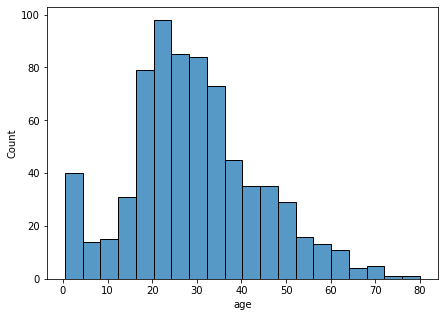

In [680]:
#CHECKING DISTRIBYUTION
sea.histplot(data['age'])

In [681]:
#REPLACING NULL WITH MEAN
mean=data['age'].mean()
data['age']=data['age'].fillna(mean)

<AxesSubplot:xlabel='age', ylabel='Count'>

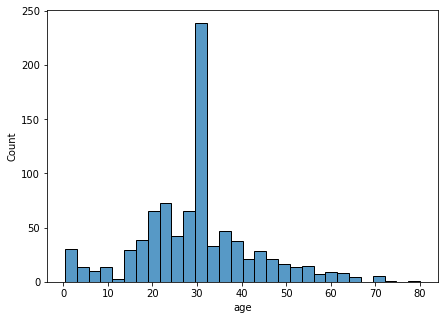

In [682]:
#RE-CHECKING DISTRIBUTION
sea.histplot(data['age'])

#### Handling 'deck' null values

<AxesSubplot:xlabel='deck', ylabel='Count'>

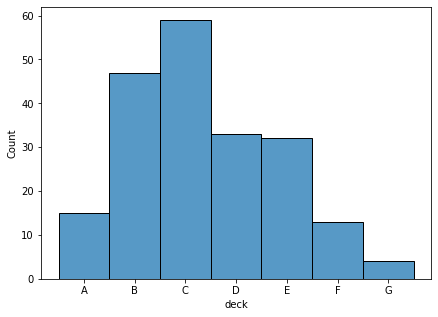

In [683]:
#CHECKING DISTRIBUTION
sea.histplot(data['deck'])

In [684]:
#THE IDEA IS TO MAINTAIN THE SHAPE/DISTRIUTION OF THE CLASSES IN DECK 
decks = data['deck'].dropna()
nulls = data['deck'].isna().sum()

replacements = np.array([])
for label in decks.unique():
    ratio = len(decks[decks==label])/len(decks)
    value = int(round(ratio*nulls))
    classrep = [label for i in range(value)]
    replacements = np.hstack((replacements,classrep))

In [685]:
data['deck'][data['deck'].isna()==True] = replacements

<AxesSubplot:xlabel='deck', ylabel='Count'>

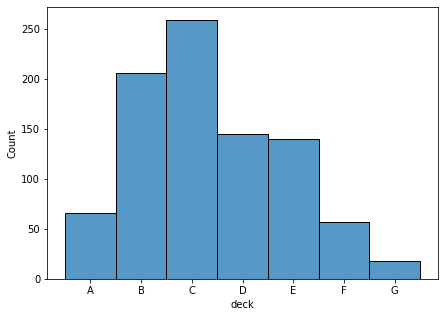

In [686]:
sea.histplot( data['deck'])

<b> You would notice that the first and second histograms have the same shape. Therefore the shape and distrubution has been maintained although nulls were filled </b> 

#### Deleting nulls rows in remaing colums

In [687]:
cleaned = data.dropna()

In [688]:
data.drop('embark_town',axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,0,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,1,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,1,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,1,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,F,0,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,1,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,F,0,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,1,True


## Feature engineering

In [689]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [690]:
# Grouping age column into 2 classes to form new column
data['age-grouped']=data['age'].apply(func=lambda x: 'mid-age' if x > 18 and x < 60 else 'valnerable')

In [691]:
#FAMILY SIZE COLUMN
data['family_size'] = data['sibsp'] + data['parch']

In [692]:
#NORMALIZATION OF AGE AND FARE COLUMNS 
scaler = StandardScaler()
scaled_age = scaler.fit_transform(data[['age']]).flatten()
data['fare']=np.log(data['fare'])
data['age']=scaled_age

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [693]:
#Label encoding
encoder=LabelEncoder()
data['who'] = encoder.fit_transform(data['who'])
data['pclass'] = encoder.fit_transform(data['pclass'])
data['sex'] = encoder.fit_transform(data['sex'])
data['embarked'] = encoder.fit_transform(data['embarked'])
data['adult_male'] = encoder.fit_transform(data['adult_male'])
data['deck'] = encoder.fit_transform(data['deck'])
data['class'] = encoder.fit_transform(data['class'])
data['age-grouped'] = encoder.fit_transform(data['age-grouped'])
data['alone']=encoder.fit_transform(data['alone'])

In [694]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age-grouped,family_size
0,0,2,1,-0.592481,1,0,1.981001,2,2,1,1,2,Southampton,0,0,0,1
1,1,0,0,0.638789,1,0,4.266662,0,0,2,0,2,Cherbourg,1,0,0,1
2,1,2,0,-0.284663,0,0,2.070022,2,2,2,0,2,Southampton,1,1,0,0
3,1,0,0,0.407926,1,0,3.972177,2,0,2,0,2,Southampton,1,0,0,1
4,0,2,1,0.407926,0,0,2.085672,2,2,1,1,2,Southampton,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,1,-0.207709,0,0,2.564949,2,1,1,1,5,Southampton,0,1,0,0
887,1,0,0,-0.823344,0,0,3.401197,2,0,2,0,1,Southampton,1,1,0,0
888,0,2,0,0.000000,1,2,3.154870,2,2,2,0,5,Southampton,0,0,0,3
889,1,0,1,-0.284663,0,0,3.401197,0,0,1,1,2,Cherbourg,1,1,0,0


## Visualisations

#### Age distributions

<AxesSubplot:xlabel='age', ylabel='Count'>

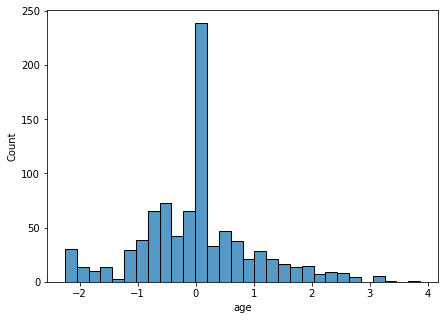

In [695]:
sea.histplot(data['age'])

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


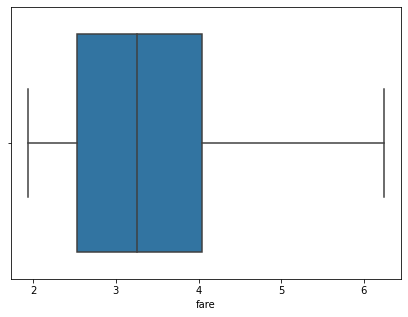

c:\users\bob.t\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

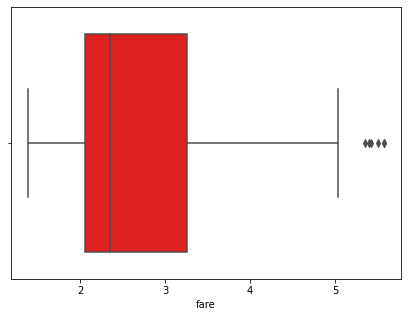

In [696]:
fare = data['fare']
sea.boxplot(fare[data['survived']==1])
plot.show()
sea.boxplot(fare[data['survived']==0],color='red')

### Correlation

<AxesSubplot:>

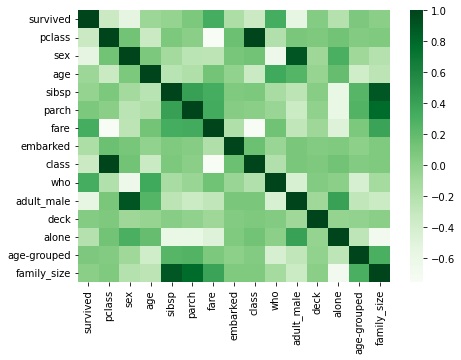

In [697]:
sea.heatmap(data.corr(),cmap='Greens')

#### PAIR-PLOT

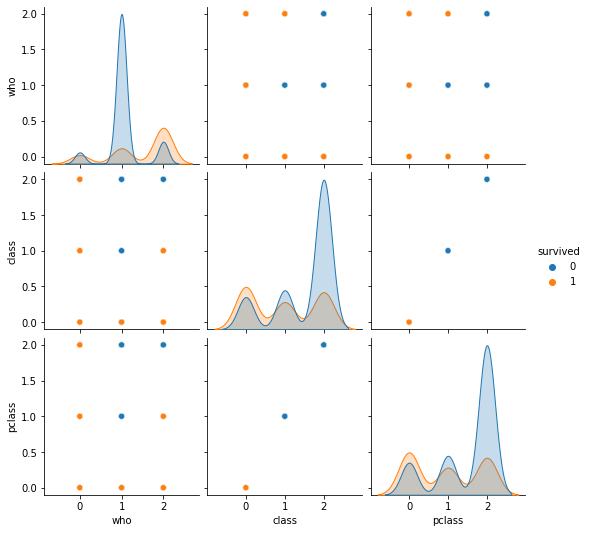

In [704]:
sea.pairplot(data[['who','class','pclass','survived']],hue='survived')